# Example 1.3.1
The perceptron of Example 1.2.2 does not converge when the data is not linearly separable. An easy fix for this problem is to update the wecannot solve problems that are not distributed in a linear fashion. The following example is a classic one and it is called the XOR problem. The labels of the data in two dimensions are distributed so that if both coordinates are positive or both are negative, then the label is -1, and if coordinates have different sign, then the label is 1. This is similar to the xor operation where $1\oplus 0 = 0 \oplus 1 = 1$ and $1 \oplus 1 = 0 \oplus 0 = 0$. After defining the needed libraries and auxuliary functions, we plot the problem and then we present a possible solution that involves a neural type structure.

### Libraries and function definitions
Here we define the activation function, its derivative and some accessory functions for representation.

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial as sp

#plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "sans-serif",
#    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
#plt.rcParams.update({
#    "text.usetex": True,
#    "font.family": "serif",
#    "font.serif": ["Palatino"],
#})
# Define the activation function (a hyperbolic tangent) and its derivative

def tanh(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

def dtanh(z):
    return (1-tanh(z)**2)

# Define functions to plot the results.
#Contour plot of the classification surface

def plots2(X,y,savefig,name):
    xmin=X.min()
    xmax=X.max()
    indexn=np.where(y==-1)
    indexp=np.where(y==1)
    plt.plot(X[0,indexp], X[1,indexp], 'b.')
    plt.plot(X[0,indexn], X[1,indexn], 'r.')
    if (y[j]==1):
        plt.plot(X[0,j], X[1,j], 'ko')
    else:
        plt.plot(X[0,j], X[1,j], 'ko')
    if (savefig):
        plt.savefig(name)
    plt.show()



### Data generation

In order to produce the data, we draw samples from four Gaussian distributions with identical spherical covariance and means centered in coordinates $(1,1), (-1,-1), (-1,1)$ and $(1,-1)$.

In [2]:
N=25                      # Number of data per cluster
k=0
y=np.zeros(4*N)
mean=np.array([[-1,-1, 1, 1],[-1,1,-1,1]])
c=np.array([-1,1,1,-1])
X=np.zeros((2,4*N))
for i in range(4):
    for j in range(N):
        x=0.1*np.random.randn(2)+mean[:,i]   # Generate a random vector of dimension 2 centered around a mean
        y[k]= c[i]      # Add a label
        X[:,k]=x                        # Store the sample if it has been properly classified
        k=k+1



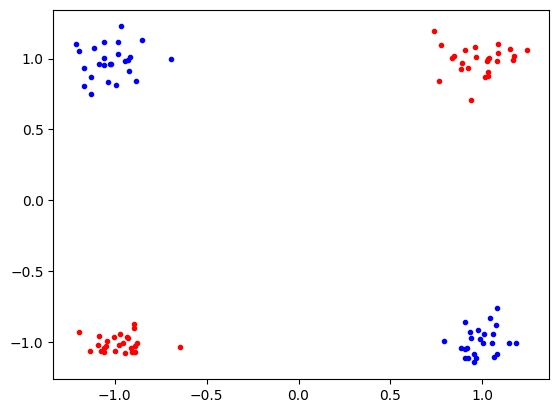

In [3]:
indexn=np.where(y==-1)
indexp=np.where(y==1)
plt.plot(X[0,indexp], X[1,indexp], 'b.')
plt.plot(X[0,indexn], X[1,indexn], 'r.')
plt.show()

### Nonlinear transformation of the data
Now we transform the data nonlinearly through two affine transformations and a nonlinear activation. Each transformation has the expression
$$
h_i({\bf x}) = \text{tanh}\left( {\bf w}^\top_i {\bf x}+ b_i \right)
$$


In [4]:
W=np.ones((2,2))
w=np.array([[2.],[-1.]])
b=np.array([[2],[0]])
H=np.tanh(W.T@X+b)
#H=np.maximum(0,W.T@X+b)
H=np.concatenate((H,np.ones((1,100))),0)
w=np.linalg.inv(H@H.T)@H@y.T

o=H.T@w

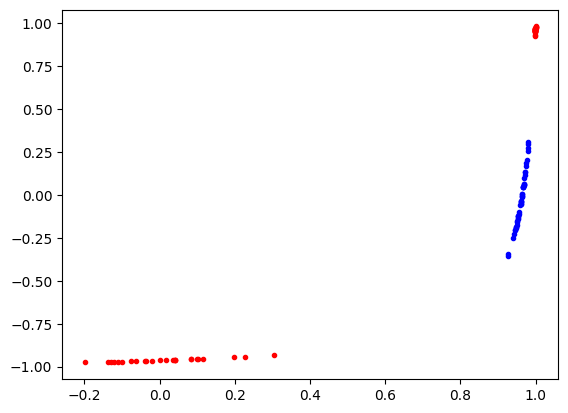

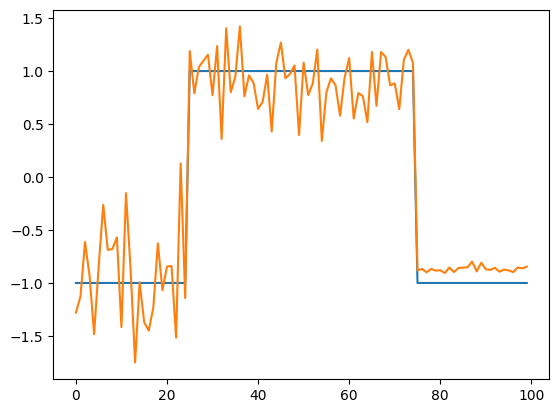

In [5]:
plt.plot(H[0,indexp], H[1,indexp], 'b.')
plt.plot(H[0,indexn], H[1,indexn], 'r.')
plt.show()
plt.plot(y)
plt.plot(o)
plt.show()